In [4]:
# importing prerequsite libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [5]:
# uploading the dataset from alocal directory
df = pd.read_csv('../tochora/baba/vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
# shape of the dataset
df.shape

(11020, 16)

this dataset has 11020 rows and 16 columns

In [ ]:
# misiing values
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

Only hashtags, user_description and user_location have null values.the rest of the columns are clean.

Text(0.5, 1.0, 'Null values in various columns')

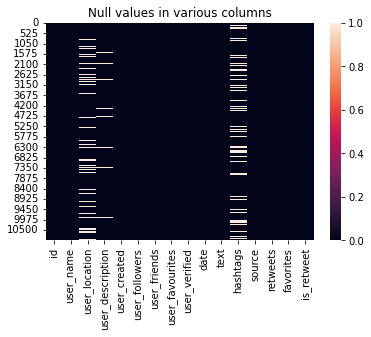

In [ ]:
# a visualization of null values
sns.heatmap(df.isnull())
plt.title('Null values in various columns')

In [ ]:
# slicing our dataset
df = df[['text', 'user_verified']]

slicing this dataset in order to feature important columns in the text.These are text and user_verified columns.

In [ ]:
df.head()

,text,user_verified
0,Same folks said daikon paste could treat a cyt...,False
1,While the world has been on the wrong side of ...,False
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,False
3,"Facts are immutable, Senator, even when you're...",True
4,Explain to me again why we need a vaccine @Bor...,False


Text(0.5, 1.0, 'Distribution of User verified')

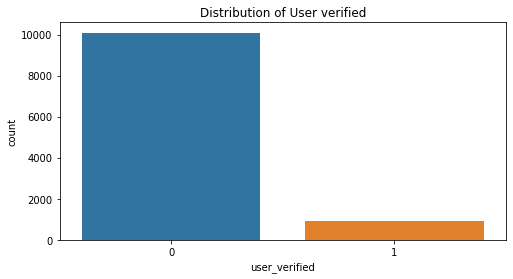

In [ ]:
# a display of distributions of user verified
plt.figure(figsize=(8, 4))
sns.countplot(x=df['user_verified'])
plt.title('Distribution of User verified')

unverified users have a high disrtibution compared to verified users. This means that most of the tweets were from unverified users while only a few of them were from verified users.This may be  because requirements of user being verified are quite high for average twitter user to satisfy.

Text(0.5, 1.0, 'Distribution of lengths of the text ')

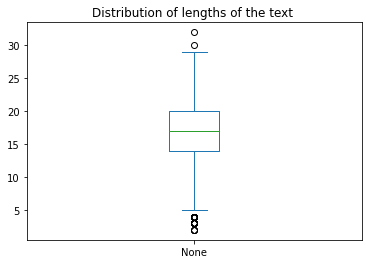

In [ ]:
# Distributions of the lengths of the text
review_len = pd.Series(len(review.split()) for review in df['text'])
review_len.plot(kind='box')
plt.title('Distribution of lengths of the text ')

In [ ]:
# converting boolean variables in user_verified into intergers
df['user_verified'] = df['user_verified'].astype(int)

In [ ]:
df.head()

,text,user_verified
0,Same folks said daikon paste could treat a cyt...,0
1,While the world has been on the wrong side of ...,0
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0
3,"Facts are immutable, Senator, even when you're...",1
4,Explain to me again why we need a vaccine @Bor...,0


count    10084.000000
mean        16.444566
std          4.713007
min          2.000000
25%         14.000000
50%         17.000000
75%         20.000000
max         32.000000
Name: Length, dtype: float64

Text(0.5, 0.98, 'Distributions of verified users')

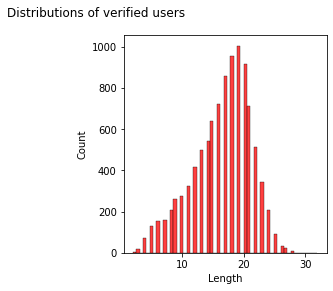

In [ ]:
fig = plt.figure(figsize=(8, 4))
axes = plt.subplot(122)
df['Length'] = df.text.str.split().apply(len)
sns.histplot(df[df['user_verified']==0]['Length'], ax=axes, color='red')
display(df.Length[df['user_verified']==0].describe())
plt.suptitle('Distributions of verified users')

Verified users have a normal distribution meaning that lengths of the tweets are concentrated at the average length of the tweets.

count    10084.000000
mean        16.444566
std          4.713007
min          2.000000
25%         14.000000
50%         17.000000
75%         20.000000
max         32.000000
Name: Length, dtype: float64

Text(0.5, 0.98, 'Distibution of unverified users')

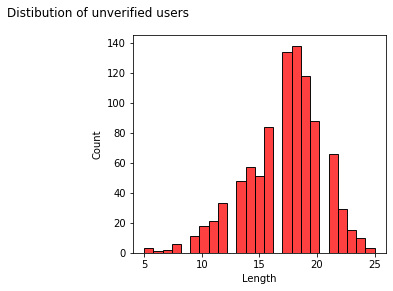

In [ ]:
fig = plt.figure(figsize=(10, 4))
axes = plt.subplot(122)
df['Length'] = df.text.str.split().apply(len)
sns.histplot(df[df['user_verified']==1]['Length'], ax=axes, color='red')
display(df.Length[df['user_verified']==0].describe())
plt.suptitle('Distibution of unverified users')

unverified users have a distribution that is negatively skewed meaning that the length of the texts are concentrated on the right side of the distribution

A wordcloud is visual representation of used in text processing which shows the most frequent words with bigger and bolder letters with different colors.The following are wordclouds of texts common in tweets from verified and unverified users.

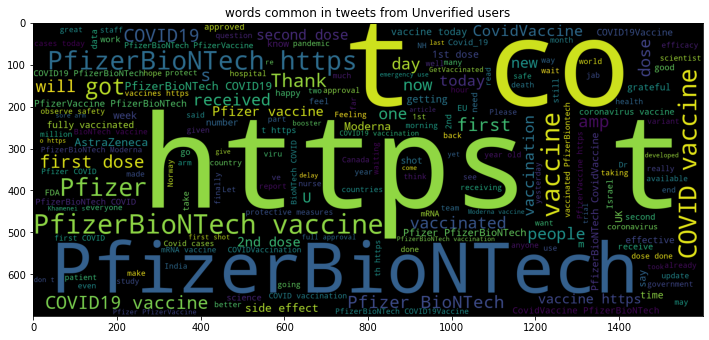

In [20]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 12))
wc = WordCloud(height=700, width=1600, background_color='black', min_font_size=10).generate(
    " ".join(df[df['user_verified']==0].text)
)
plt.title('words common in tweets from Unverified users')
plt.imshow(wc)

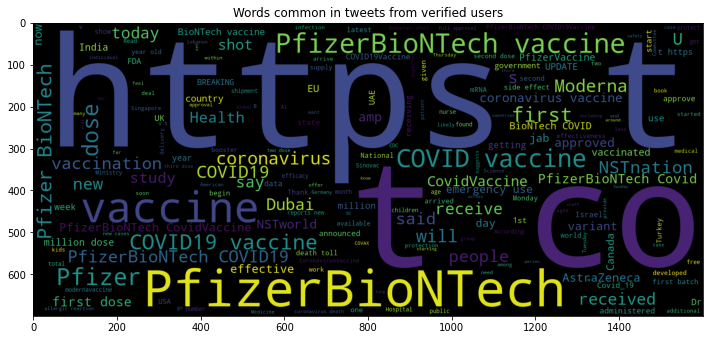

In [21]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 12))
wc = WordCloud(height=700, width=1600, background_color='black', min_font_size=10).generate(
    " ".join(df[df['user_verified']==1].text)
)
plt.title('Words common in tweets from verified users')
plt.imshow(wc)

In [ ]:
# importing packages necessary to clean data
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# a function to clean data
def preprocessing_data(data):
    # creating an empty list 
    corpus = []
    for i in range(0, len(data)):
        # removing urls in the text
        tweet2 = re.sub('http\S+', ' ', data['text'][i])
        #tweet2 = re.sub('<.?*>', ' ', tweet1)
        # removing digits in the text
        tweet3 = re.sub('\d', ' ', tweet2)
        # removing hashtags in the text
        tweet4 = re.sub('#\w+', ' ', tweet3)
        # removing punctuation marks in the text
        review = re.sub(r'[^a-zA-Z]', ' ', tweet4)
        # converting text from proper case to lower case
        review = review.lower()
        # creating spaces in the text
        review = review.split()
        # removing stopwords in the text
        review = [word for word in review if word not in set(stopwords.words('english'))]
        # modifying words in the text by reducing them into their basic forms
        review = [ps.stem(word) for word  in review]
        # removing spaces in the text
        review = ' '.join(review)
        # adding changes in our text into an empty list
        corpus.append(review)
    return corpus

In [ ]:
# applying the cleaning function to our text
cleaned_df = preprocessing_data(df)


In [ ]:
# a sample of the 1st 10 lines of cleaned text
cleaned_df[:10]

['folk said daikon past could treat cytokin storm',
 'world wrong side histori year hope biggest vaccin effort ev',
 'russian vaccin creat last year',
 'fact immut senat even ethic sturdi enough acknowledg born',
 'explain need vaccin borisjohnson matthancock',
 'anyon use advic guidanc whether covid vaccin safe whilst breastfeed',
 'bit sad claim fame success patriot competit usa canada uk',
 'mani bright day best win',
 'covid vaccin get',
 'state start get vaccin monday say']

In [ ]:
# splitiing cleaned dataset into x and y variables
x = cleaned_df
y = df['user_verified']

In [ ]:
# further splitting x and y variables into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# applying tfid vectorizer which counts most ferquent words in the text and converting them into a vector relative to the importance of the text
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range=(1, 3),  max_features=10000)
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [ ]:
# modelling 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print(score)
pred = lr.predict(x_test)


0.9060798548094374


logistic regression have an accuracy of 90%

In [ ]:
# a complete report on performance of the models
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2199
           1       0.02      0.80      0.04         5

    accuracy                           0.91      2204
   macro avg       0.51      0.85      0.49      2204
weighted avg       1.00      0.91      0.95      2204

